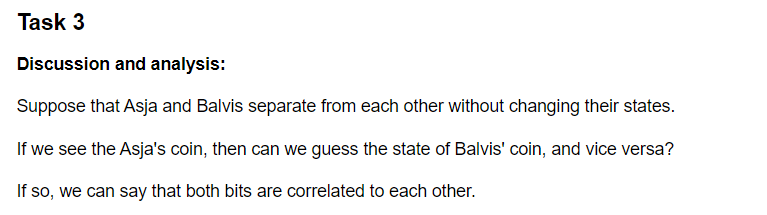

How is this possible: 
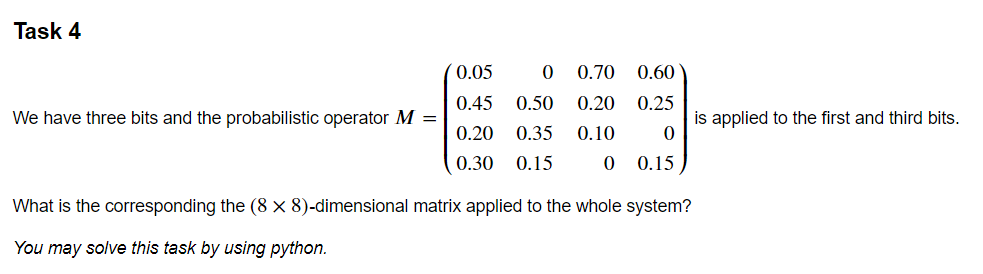

$$How \ to \ apply \
FairBit = \begin{bmatrix} 0.5 & 0.5 \\ 0.5 & 0.5 \\ \end{bmatrix} \
to \ 2nd \ bit \ in \ this \ : \
[000] = \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ \end{bmatrix} \ 
\text{I mean which is the bit in column vector called 2nd bit ?}
$$

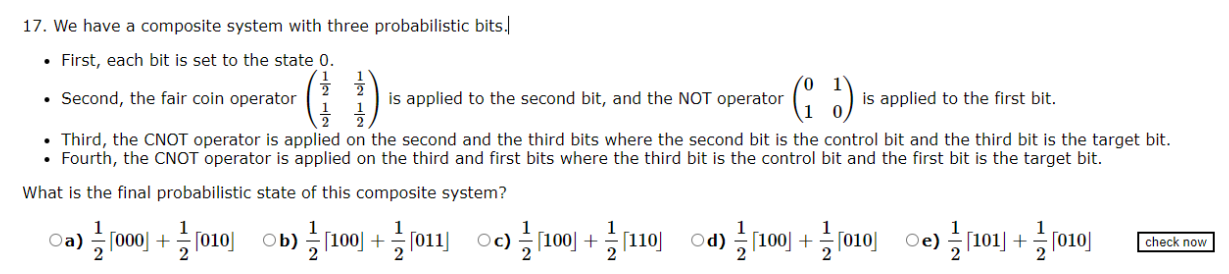

# How to factor a composite statevector? 

eg: 

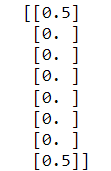

# How is this done without even doing the actual matrix calculation: 

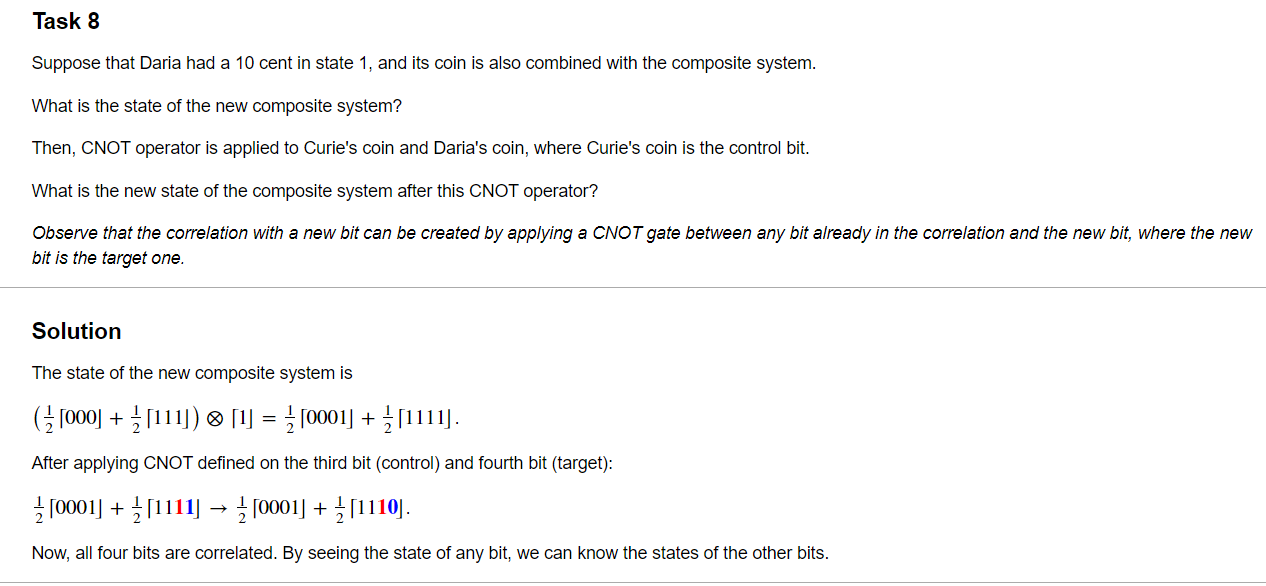

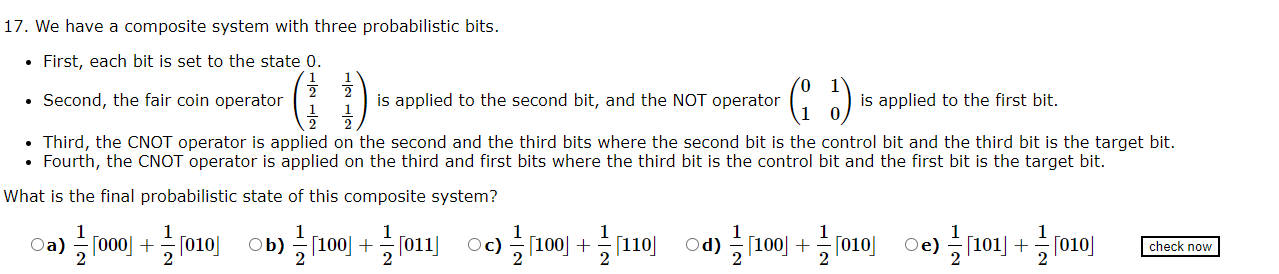

In [6]:
# bits
import numpy as np

bit_1 = np.array([[1], [0]])
bit_2 = np.array([[1], [0]])
bit_3 = np.array([[1], [0]])

whole_state = np.kron(bit_1, np.kron(bit_2, bit_3)) # First, each bit is set to 0

print(whole_state)
print()

# operators

identity_1bit = np.identity(2)

fair_coin_op_1bit = np.array([[0.5, 0.5], [0.5, 0.5]])
fair_coin_op_3bit_affect_2nd = np.kron(identity_1bit, np.kron(fair_coin_op_1bit, identity_1bit)) 

print("fair_coin_op_3bit_affect_2nd=\n",fair_coin_op_3bit_affect_2nd)
print()

not_op_1bit = np.array([[0, 1], [1, 0]])
not_op_3bit_affect_1st = np.kron(not_op_1bit, np.kron(identity_1bit, identity_1bit))

print("not_op_3bit_affect_1st=\n",not_op_3bit_affect_1st)
print()

# -------

cnot_op_control1st_target2nd = np.array([
    [1,0,0,0],
    [0,1,0,0],
    [0,0,0,1],
    [0,0,1,0]
])

cnot_op_control1st_target2nd_affect_2_3 = np.kron(identity_1bit, cnot_op_control1st_target2nd)

print("cnot_op_control1st_target2nd_affect_2_3=\n",cnot_op_control1st_target2nd_affect_2_3)
print()

# apply operators

res = np.matmul(fair_coin_op_3bit_affect_2nd, whole_state)

res = np.matmul(not_op_3bit_affect_1st, res)

res = np.matmul(cnot_op_control1st_target2nd_affect_2_3, res)

print("res=\n",res)
print()


[[1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]

fair_coin_op_3bit_affect_2nd=
 [[0.5 0.  0.5 0.  0.  0.  0.  0. ]
 [0.  0.5 0.  0.5 0.  0.  0.  0. ]
 [0.5 0.  0.5 0.  0.  0.  0.  0. ]
 [0.  0.5 0.  0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.5 0.  0.5 0. ]
 [0.  0.  0.  0.  0.  0.5 0.  0.5]
 [0.  0.  0.  0.  0.5 0.  0.5 0. ]
 [0.  0.  0.  0.  0.  0.5 0.  0.5]]

not_op_3bit_affect_1st=
 [[0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]]

cnot_op_control1st_target2nd_affect_2_3=
 [[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0.]]

res=
 [[0. ]
 [0. ]
 [0. ]
 [0. ]
 [0.5]
 [0. ]
 [0. ]
 [0.5]]



## Model

1. First, each bit is set to the state 0. Therefore Resultant expression without solving =

$$
\begin{bmatrix} 1 \\ 0 \end{bmatrix} \otimes \begin{bmatrix} 1 \\ 0 \end{bmatrix} \otimes \begin{bmatrix} 1 \\ 0 \end{bmatrix}
$$

2.1 Second, the fair coin operator $\begin{bmatrix} 0.5  & 0.5 \\ 0.5 & 0.5 \end{bmatrix}$ is applied to the second bit. Therefore Resultant expression becomes =

$$
 I_2 \otimes \begin{bmatrix} 0.5 & 0.5 \\ 0.5 & 0.5 \end{bmatrix} \otimes I_2 
$$


2.2 NOT operator $\begin{bmatrix} 0  & 1 \\ 1 & 0 \end{bmatrix}$ is applied to the first bit. Therefore Resultant expression becomes =

$$
 \begin{bmatrix} 0  & 1 \\ 1 & 0 \end{bmatrix}$ \otimes I_2 \otimes I_2
$$

Where $I_2 = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} $


3. Third, the CNOT operator is applied on the second and the third bits where the second bit is the control bit and the third bit is the target bit. Thus the resultant expression becomes =

$$
I_2 \otimes CNOT_{c=2, t=3}
$$




4. Fourth, the CNOT operator is applied on the third and first bits where the third bit is the control bit and the first bit is the target bit. Thus the resultant expression becomes =

$$
CNOT_{c=3, t=1}
$$


## My approach of solving:


In [11]:
import numpy as np

bit_1 = np.array([[1], [0]])
bit_2 = np.array([[1], [0]])
bit_3 = np.array([[1], [0]])

# First, each bit is set to the state 0.
whole_state = np.kron(bit_1, np.kron(bit_2, bit_3)) # First, each bit is set to 0

print(whole_state)
print()

# Second, the fair coin operator  [0.50.50.50.5]  is applied to the second bit. 
# I2 (X) M (X) I2
temp = np.kron(np.identity(2), np.kron( np.array([[0.5,0.5],[0.5,0.5]]), np.identity(2) ) )

whole_state = np.matmul(temp,whole_state)

print(whole_state)
print()

# NOT operator  [0110]  is applied to the first bit.
# M (X) I2 (X) I2
temp = np.kron( np.array([[0.5,0.5],[0.5,0.5]]) , np.kron( np.identity(2), np.identity(2) ) )

whole_state = np.matmul(temp,whole_state)

print(whole_state)
print()


# Third, the CNOT operator is applied on the second and the third bits 
# where the second bit is the control bit and the third bit is the target bit.
#  I2 (X) CNOT (C=2,T=3) 4by4

Cnot_23 = np.array([
    [1,0,0,0],
    [0,1,0,0],
    [0,0,0,1],
    [0,0,1,0]
])


temp = np.kron( np.identity(2), Cnot_23) 

whole_state = np.matmul(temp,whole_state)

print(whole_state)
print()


# Fourth, the CNOT operator is applied on the third and first bits 
# where the third bit is the control bit and the first bit is the target bit. 

#   CNOT (C=3,T=1) 4by4

Cnot_31 = np.array([
    [1,0,0,0],
    [0,1,0,1],
    [0,0,1,0],
    [0,1,0,0]
])

# What should i put here
temp = np.kron(np.identity(2),Cnot_31) 

whole_state = np.matmul(temp,whole_state)

print(whole_state)
print()



[[1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]

[[0.5]
 [0. ]
 [0.5]
 [0. ]
 [0. ]
 [0. ]
 [0. ]
 [0. ]]

[[0.25]
 [0.  ]
 [0.25]
 [0.  ]
 [0.25]
 [0.  ]
 [0.25]
 [0.  ]]

[[0.25]
 [0.  ]
 [0.  ]
 [0.25]
 [0.25]
 [0.  ]
 [0.  ]
 [0.25]]

[[0.25]
 [0.25]
 [0.  ]
 [0.  ]
 [0.25]
 [0.25]
 [0.  ]
 [0.  ]]

